# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [38]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [39]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)

In [40]:
feat_df <- read.table("../../../output/PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/one_wayANOVA_PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_fullreport.csv"
        ,row.names = 1, header = TRUE, sep = ',')

In [41]:
head(feat_df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Naive_percNA,Naive_mean,R5neg_percNA,R5neg_mean,R5pos_percNA,R5pos_mean,gMean_Naive,gMean_R5neg,gMean_R5pos,log2FC_R5negvsNaive,log2FC_R5posvsNaive,log2FC_R5posvsR5neg,f_score,pval,padj,Tpadj_R5neg.Naive,Tpadj_R5pos.Naive,Tpadj_R5pos.R5neg,TFDR_R5neg.Naive,TFDR_R5pos.Naive,TFDR_R5pos.R5neg,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F10769,372.7447,25.17,23.59,28.32,9930,2649961,1,0.99,456,5,0.3333333,607321,0,814311.7,1.0000000,NA,18.87393,19.87924,18.18448,1.00530733,-0.689451593,-1.6947589,10.665303620,0.010580493,0.04520756,0.07683568,0.2276851,0.008865051,0.24476873,0.6820729,0.03787795,19.18448,19.25283,18.18448,19.42996,20.42619,19.78156,18.18448,18.18448,18.18448,NA,NA,NA
F11541,384.7631,38.83,36.20,41.72,10150,748661750,1,0.97,86549,22,0.0000000,38240480,0,15914575.0,0.0000000,51969739,25.08034,24.22063,25.29502,-0.85970886,0.214678350,1.0743872,14.781111902,0.004802717,0.02508086,0.01480787,0.5886961,0.005142230,0.09942426,0.8646473,0.02420651,25.47994,24.98491,24.77617,24.17855,24.45577,24.02758,25.23576,25.45258,25.19671,25.99780,25.03423,25.0114
F13199,548.3007,24.64,22.28,27.79,12591,124579197,1,0.87,7880,13,0.0000000,18878581,0,14459066.7,0.0000000,24287771,24.06018,24.08319,24.05723,0.02300941,-0.002942386,-0.0259518,0.001440125,0.998561256,0.99856126,0.99895988,0.9999830,0.998677101,0.99895988,1.0000000,0.99867710,24.08338,24.45670,23.64044,24.37743,23.83728,24.03485,22.91200,24.82122,24.43848,16.85336,NA,NA
F13675,557.3588,25.43,23.59,28.32,12697,4217228,1,0.97,587,6,1.0000000,NA,0,1002160.7,0.3333333,1337436,18.72961,20.24748,19.62756,1.51786475,0.897943497,-0.6199213,7.103773875,0.026176580,0.05672360,0.02224461,0.1463886,0.342844709,0.13068706,0.6520000,0.40284253,18.72961,18.72961,18.72961,20.27951,20.12174,20.34119,18.72961,19.72961,20.42344,NA,NA,NA
F13861,486.2846,25.95,24.38,28.84,11788,3788049,1,0.84,363,5,0.6666667,610026,0,1308415.7,0.6666667,1049975,18.55184,20.54879,18.73663,1.99694951,0.184788115,-1.8121614,7.055995090,0.026551472,0.05672360,0.03347616,0.9473926,0.049005113,0.17481994,1.0000000,0.09212961,18.21851,19.21851,18.21851,19.84244,20.70139,21.10255,18.21851,19.77288,18.21851,NA,NA,NA
F14458,571.3745,25.69,23.59,28.84,12860,57656484,1,0.89,6250,12,0.0000000,6641773,0,6248091.5,0.0000000,9920116,22.52329,22.87460,22.89693,0.35131175,0.373643249,0.0223315,1.243703167,0.353287904,0.38615189,0.43481961,0.3959534,0.996117395,0.65924263,0.7443924,0.99867710,22.18899,22.59417,22.78670,22.89830,23.05746,22.66804,22.39844,23.13912,23.15323,NA,NA,NA


In [42]:
meta_df <- read.table("../../../input/sequence_file/clean_deduplicated_meta_df.csv",
                     header = TRUE, sep = ',', row.names = 1)

In [43]:
head(meta_df,5)

,class,biological_samples,cell_number
,<chr>,<chr>,<int>
Naive_1,Naive,Yes,300
Naive_2,Naive,Yes,300
Naive_3,Naive,Yes,300
R5neg_1,R5neg,Yes,655
R5neg_2,R5neg,Yes,687


In [44]:
sample_names = colnames(feat_df)[grepl('Naive\\_[0-9]+|R5pos\\_[0-9]+|R5neg\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "Naive_1" "Naive_2" "Naive_3" "R5neg_1" "R5neg_2" "R5neg_3" "R5pos_1"
[8] "R5pos_2" "R5pos_3"

[1] 9

[1] "padj"              "Tpadj_R5neg.Naive" "Tpadj_R5pos.Naive"
[4] "Tpadj_R5pos.R5neg"

In [45]:
colnames(meta_df)

[1] "class"              "biological_samples" "cell_number"

# Define filtering level - FDR control

In [46]:
filtered_level = 0.05
feat_df.filt = feat_df[feat_df$padj < filtered_level & !is.na(feat_df$padj),]

In [47]:
dim(feat_df.filt)

[1] 11 43

## subset datatable with only data values

In [48]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [49]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [50]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -1.792046  1.762498

#### columns and rows annotation

In [51]:
colnames(meta_df)

[1] "class"              "biological_samples" "cell_number"

In [52]:
unique(meta_df$class)

[1] "Naive" "R5neg" "R5pos"

## Since the metadata is not exclusively the data 

In [53]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [54]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'class') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [55]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'class')

In [56]:
annotation_col = data.frame(class = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [57]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [58]:
annotation_col$class

[1] "Naive" "Naive" "Naive" "R5neg" "R5neg" "R5neg" "R5pos" "R5pos" "R5pos"

#### Annotation of rows (here don't have these)

In [59]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [60]:
class = c("#888888","#0000ff","#ff0000")
names(class) = c("Naive","R5pos","R5neg")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [61]:
ann_colors = list(class = class)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [62]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.792046  1.762498

In [63]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2

In [64]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.792046  1.762498

In [65]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [66]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [67]:
out_dir = "../../../output/PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA//heatmap/"
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_HILICpos_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_padj{filtered_level}_heatmap.pdf"))

Warning message in dir.create(out_dir):
“'../../../output/PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA//heatmap' already exists”


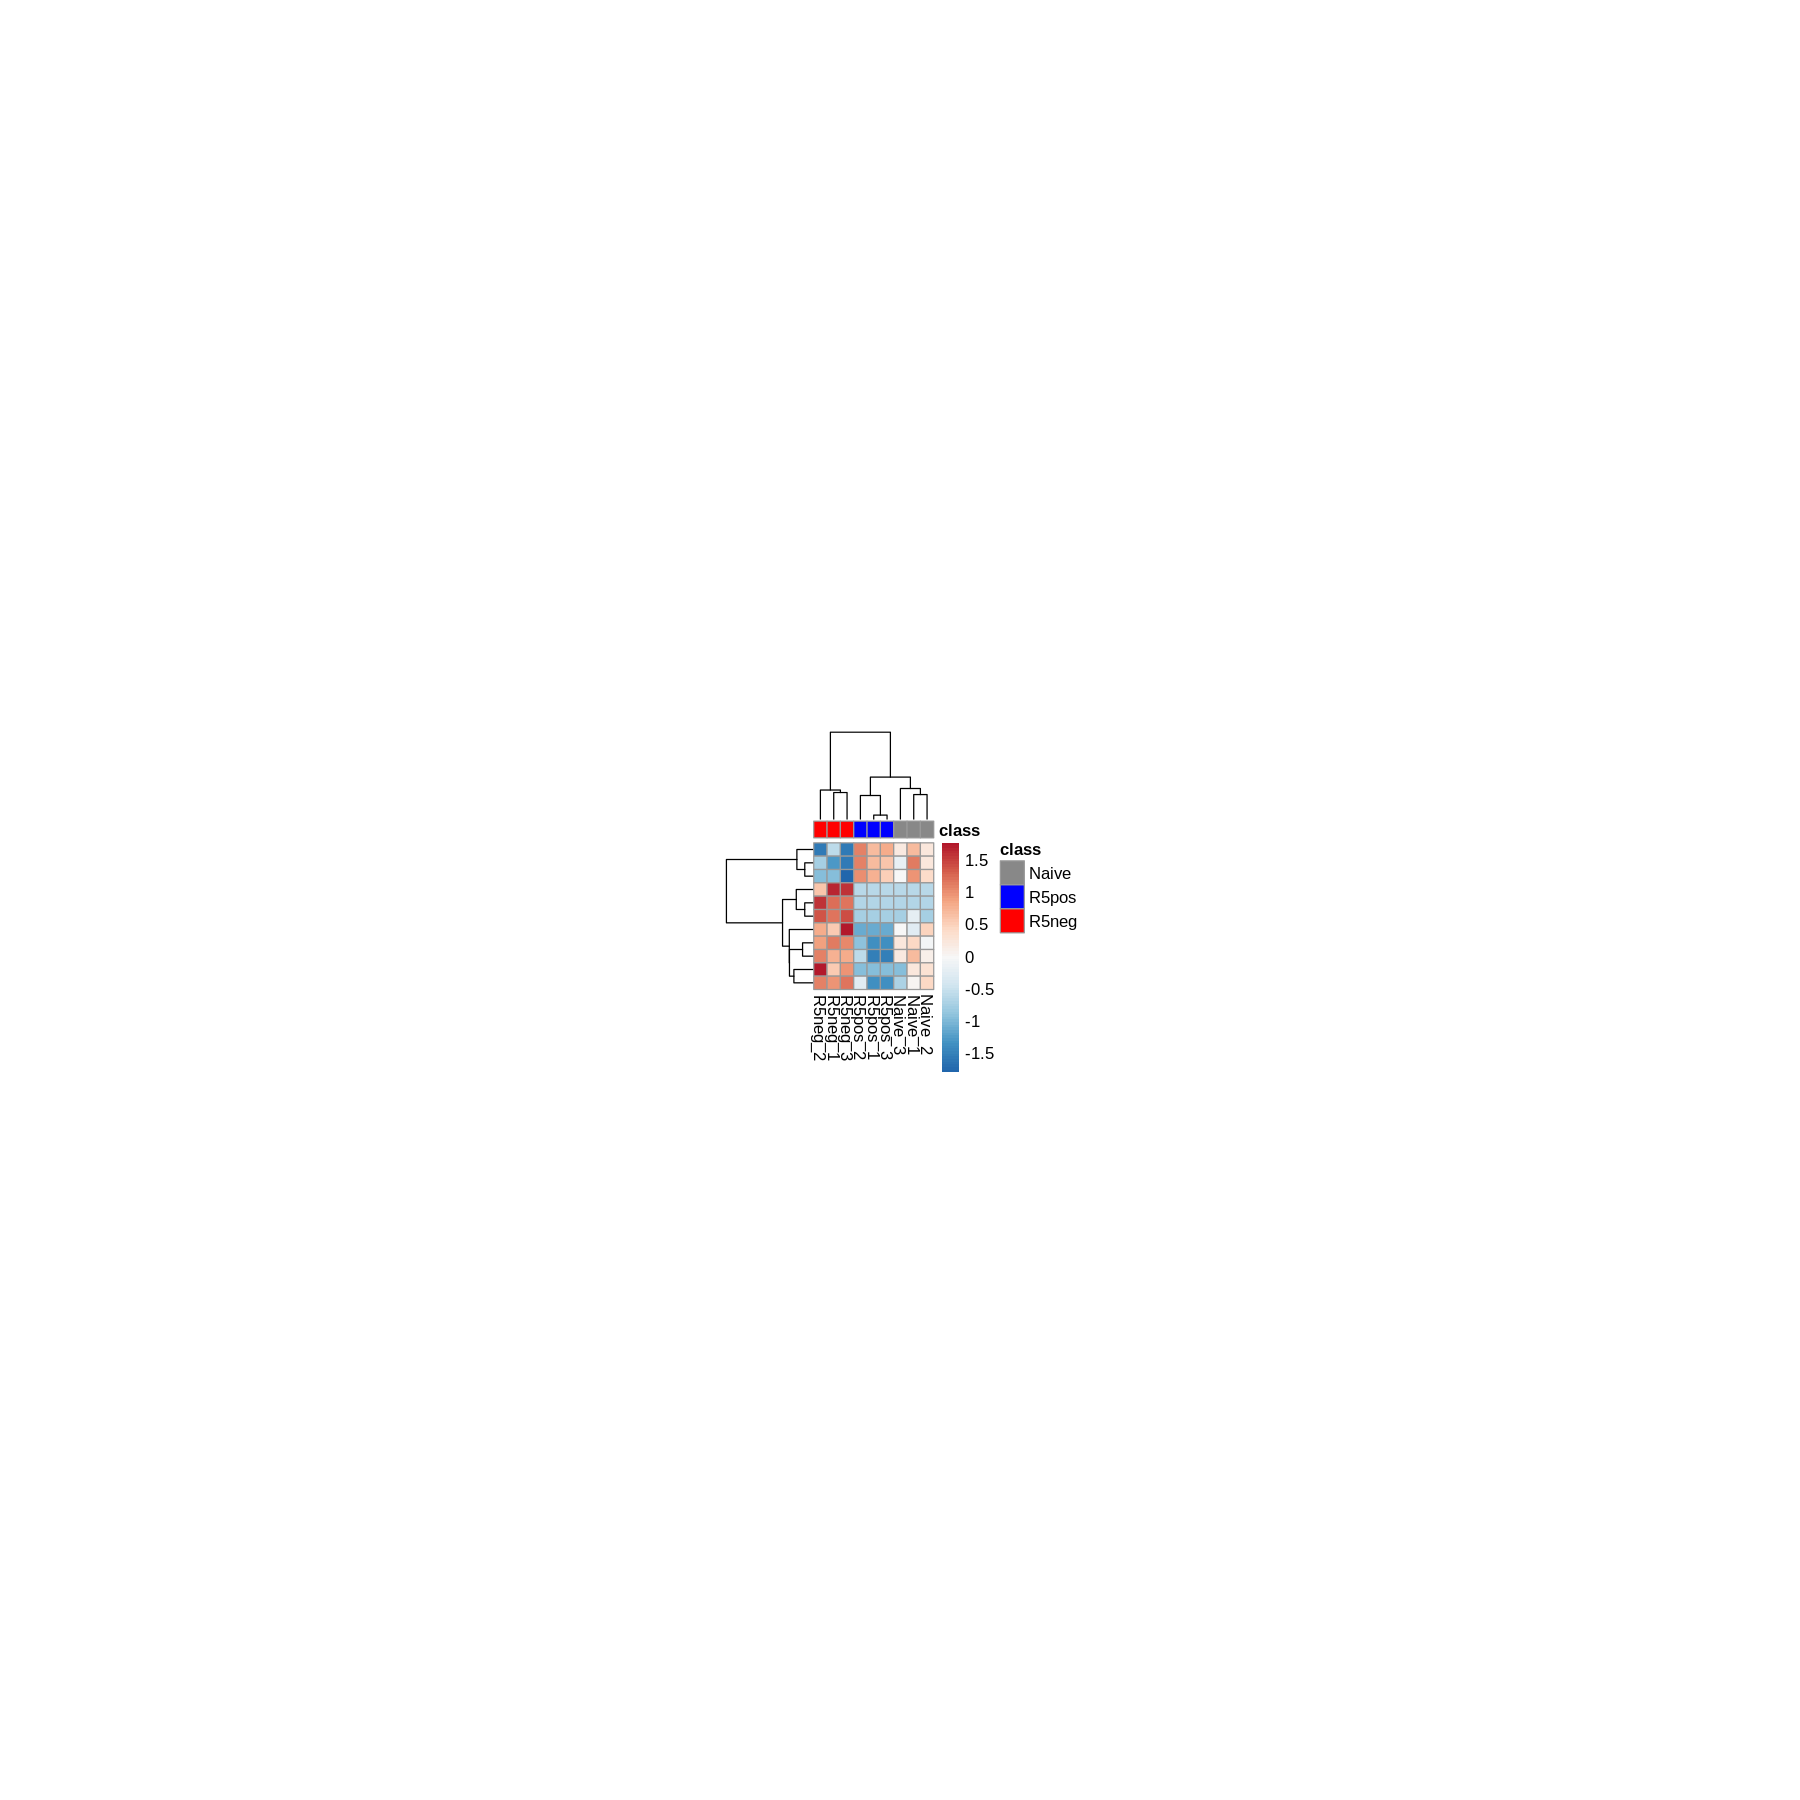

In [68]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = FALSE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 8,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----